In [1]:
from utils.settings import *
from utils.delft_tools import *
from utils.budapest_tools import *

fig_size_single = 3.37
fig_size_double = 6.69

# Fitting the spectrums

## fQ1

Fit results:
g10, A1-B1 (1/mV), (Omega^2-t^2)/U (GHz), alpha/U (1/mV)
[ 0.17439217  0.00104254 -0.01145871  0.03582596]
[3.32897768e-04 1.97520528e-05 1.04054287e-03 1.55299974e-04]


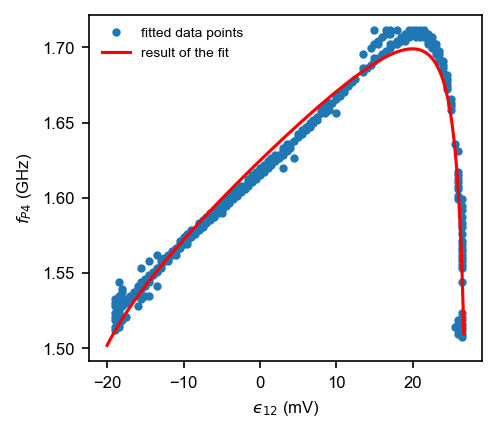

In [2]:
data_fq1=np.loadtxt('vPdetuning_set_frequency_set.dat')  #load in the data of fq1 resonance frequency 
fp4=data_fq1[:,1]*10**(-9)
VP2=data_fq1[:,0]
p=data_fq1[:,2]

muB=57.883818060*0.241799050402293  #Bohr-magneton in GHz 
B=0.675                             #magnetic field in Tesla 

p_max=max(p)      #this is the point with the highest probability 
fp4_fit=[]
VP2_fit=[]
p_fit=[]

for i in range(len(p)):        #This is where we search for the resonant points
    if p[i]>0.48*p_max:        #because the resonance is quite sharp, it is enough to look for points with high probability
        if fp4[i]<1.712:
            if VP2[i]<9.7 and VP2[i]>-13.5:
                if not(fp4[i]>1.56 and VP2[i]>8):     #here we drop the noise
                    if not(fp4[i]<1.51 and VP2[i]>8):
                        fp4_fit.append(fp4[i])        #store the points
                        VP2_fit.append(VP2[i])
                        p_fit.append(p[i])
fp4_fit=np.array(fp4_fit)
VP2_fit=np.array(VP2_fit)
p_fit=np.array(p_fit)
eps12_fit=-2*VP2_fit

popt,pcov=curve_fit(fq1_fit,eps12_fit,fp4_fit,p0=[0.18,0.0017,-0.05,0.032],maxfev=100000) #we fit the data points 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('g10, A1-B1 (1/mV), (Omega^2-t^2)/U (GHz), alpha/U (1/mV)')
print(popt)
print(perr)

gamma=popt[2]    #store fitting parameters 
dgamma=perr[2]
g10=popt[0]
c1=popt[1]
d=popt[2]
aU=popt[3]*10**(-3)
a=popt[3]

plt.plot(eps12_fit,fp4_fit,linestyle='',marker='.',label='fitted data points')   #plot the found resonance points 

x=np.linspace(-20,26.7,5000)
plt.plot(x,fq1_fit(x,popt[0],popt[1],popt[2],1.00*popt[3]),color='red',label='result of the fit')  #plot the result 

plt.ylabel(r'$f_{P4}$ (GHz)')
plt.xlabel(r'$ϵ_{12}$ (mV)')
plt.legend()

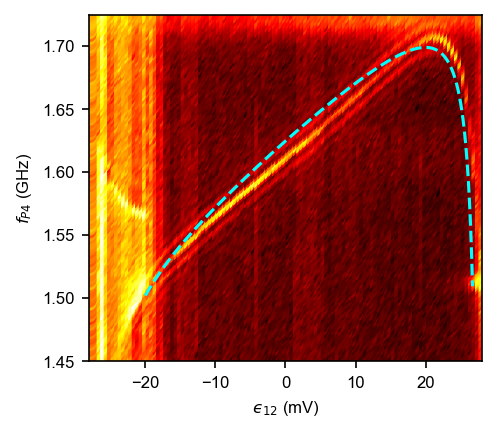

In [3]:
#draw the fit result on the colormap 
fig, ax = plt.subplots()

fp4_r = np.reshape(fp4,(113, 121))
VP2_r = np.reshape(VP2,(113, 121))
p_r = np.reshape(p,(113, 121))

rbf = scipy.interpolate.Rbf(-2*VP2_r,fp4_r,p_r, function='linear')

zi = rbf(fp4_r, VP2_r)

plt.imshow(zi, vmin=p_r.min(), vmax=p_r.max(), origin='lower',aspect='auto',
           extent=[fp4_r.min(), fp4_r.max(), VP2_r.min(), VP2_r.max()])

plt.scatter(-2*VP2_r,fp4_r, c=p_r,cmap='hot')  #plot the colormap, to see the result of the fitting 
x=np.linspace(-20,26.7,5000)
ax.set_ylim(min(fp4),max(fp4))
ax.set_xlim(-2*max(VP2),-2*min(VP2))
ax.plot(x,fq1_fit(x,popt[0],popt[1],popt[2],popt[3]),linestyle='dashed',color='cyan')  #plot the result of the fit 

ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.set_xlabel(r'$ϵ_{12}$ (mV)')
fig.savefig('fq1-eps12.png', format='png', dpi=300,bbox_inches="tight")
fig.savefig('fq1-eps12.pdf', format='pdf', dpi=300,bbox_inches="tight")

## fQ2 spectrum

The spectrum of the fQ2 will be fitted similarly to the spectrum of fQ1, but two parameters are the same in the two theoretical formulas, so those two parameters, which we already know from the fit of fQ1 here will be input parameters.

Fit results:
g20, B2-A2 (1/mV)
[ 0.27062503 -0.00142594]
[1.45750060e-04 1.63320351e-05]


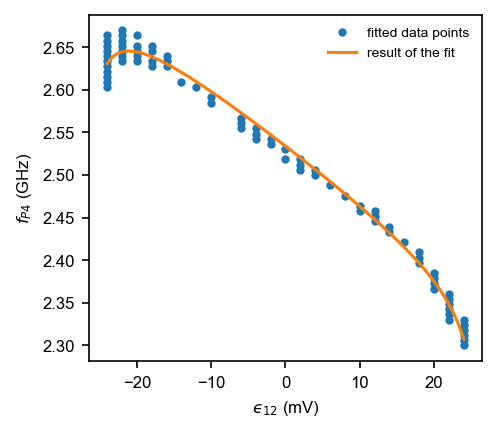

In [4]:
data_fq2=np.loadtxt('vPB12_set_frequency_set.dat')  #load the data for the detuning dependence of the fq2 
fp4_fq2=data_fq2[:,1]*10**(-9)
VP1_fq2=data_fq2[:,0]
p_fq2=data_fq2[:,2]

fig, ax = plt.subplots()

fp4_fq2_r = np.reshape(fp4_fq2,(25, 100))
VP1_fq2_r = np.reshape(VP1_fq2,(25, 100))
p_fq2_r = np.reshape(p_fq2,(25, 100))

p_fq2_max=max(p_fq2)     #the point with the highest probability 
fp4_fq2_fit=[]
VP1_fq2_fit=[]
p_fq2_fit=[]

for i in range(len(p_fq2)):
    if p_fq2[i]>0.5*p_fq2_max:         #the resonance is sharp, so we can look for points with high enough probability
        if not(fp4_fq2[i]>2.5 and VP1_fq2[i]>10):  #we drop the noise 
            fp4_fq2_fit.append(fp4_fq2[i])
            VP1_fq2_fit.append(VP1_fq2[i])
            p_fq2_fit.append(p_fq2[i])
fp4_fq2_fit=np.array(fp4_fq2_fit)
VP1_fq2_fit=np.array(VP1_fq2_fit)
p_fq2_fit=np.array(p_fq2_fit)
eps12_fit=2*VP1_fq2_fit

popt,pcov=curve_fit(fq2_fit,eps12_fit,fp4_fq2_fit,p0=[0.25,-0.0017],maxfev=50000)   #fitting of the data points 
perr=np.sqrt(np.diag(pcov))
print('Fit results:')
print('g20, B2-A2 (1/mV)')
print(popt)
print(perr)

g20=popt[0]  #store fitting parameters 
c2=popt[1]

x=np.linspace(2*min(VP1_fq2),2*max(VP1_fq2),5000)
plt.plot(eps12_fit,fp4_fq2_fit,linestyle='',marker='.',label='fitted data points')  #plot the found data points 
plt.plot(x,fq2_fit(x,popt[0],popt[1]),label='result of the fit')                      #plot the result of the fit 
plt.ylabel(r'$f_{P4}$ (GHz)')
plt.xlabel(r'$ϵ_{12}$ (mV)')

plt.legend()

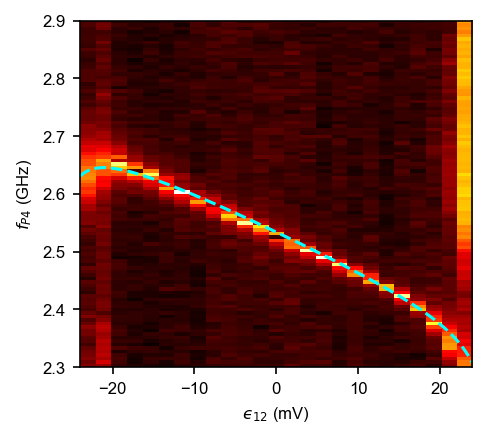

In [5]:
#plot the fit result on the colormap
fig, ax = plt.subplots()

fp4_fq2_r = np.reshape(fp4_fq2,(25,100)).T
VP1_fq2_r = np.reshape(VP1_fq2,(25, 100)).T
p_fq2_r = np.reshape(p_fq2,(25, 100)).T

rbf = scipy.interpolate.Rbf(2*VP1_fq2_r,fp4_fq2_r,p_fq2_r, function='linear')

zi = rbf(2*VP1_fq2_r,fp4_fq2_r)

plt.imshow(zi, vmin=p_fq2_r.min(), vmax=p_fq2_r.max(),origin='lower',aspect='auto',cmap='hot',
           extent=[2*VP1_fq2_r.min(), 2*VP1_fq2_r.max(),fp4_fq2_r.min(), fp4_fq2_r.max()])

#plt.scatter(2*VP1_fq2_r,fp4_fq2_r,c=p_fq2_r,cmap='hot')        #plot the heat plot 
x=np.linspace(2*min(VP1_fq2),2*max(VP1_fq2),5000)
ax.set_ylim(min(fp4_fq2),max(fp4_fq2))
ax.set_xlim(2*min(VP1_fq2),2*max(VP1_fq2))
ax.plot(x,fq2_fit(x,popt[0],popt[1]),linestyle='dashed',color='cyan')  #plot the result of the fit 

ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.set_xlabel(r'$ϵ_{12}$ (mV)')

fig.savefig('fq2-eps12.png', format='png', dpi=300,bbox_inches="tight")
fig.savefig('fq2-eps12.pdf', format='pdf', dpi=300,bbox_inches="tight")

# Power attenuation

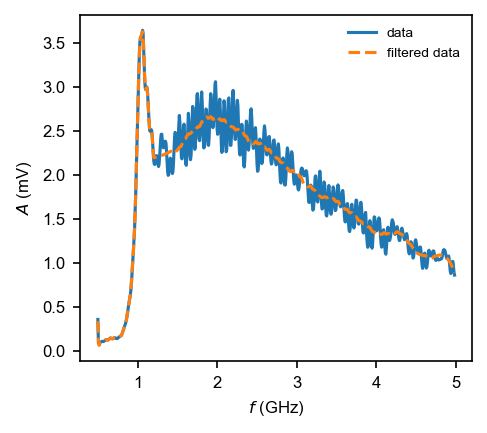

In [6]:
fig, ax = plt.subplots()

attenuation=np.loadtxt("attenuation.txt") #import power attenuation data 
A_RMS=attenuation[1,:]       #Root mean square amplitude
A=attenuation[1,:]*np.sqrt(2)  #amplitude 
freq=attenuation[0,:]        #frequency 

n=105                #divide the data in two parts 
A_first=A[0:n]
A_second=A[n:len(A)]

A_filtered1=savgol_filter(A_first,7,3)     #first part that contains a peak is filtered with a smaller window
A_filtered2=savgol_filter(A_second,65,3)   #second part is filtered with a larger window
A_filtered1=np.array(A_filtered1)
A_filtered2=np.array(A_filtered2)

A_filtered=np.concatenate((A_filtered1,A_filtered2))   

A_final=interp1d(freq,A_filtered,kind='cubic')   #interpolate the filtered data 

ax.plot(freq,A,label='data')                                         #plot result 
ax.plot(freq,A_filtered,label='filtered data',linestyle='dashed')
ax.set_xlabel(r'$f$ (GHz)')
ax.set_ylabel(r'$A$ (mV)')

ax.legend()

fig.savefig('attenuation_filter.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('attenuation_filter.pdf',format='pdf',dpi=300,bbox_inches="tight")

# Fitting anticrossings

## AC2

In [7]:
data11=np.loadtxt('mixing_set_delta_set_q1diff_11.dat')  #load the anticrossing data at detunings ranging from (-11,11) to (-7,7)
fp4_11=data11[:,0]
dfp2_11=data11[:,1]
p_11=data11[:,2]
pmax_11=max(p_11)

data10=np.loadtxt('mixing_set_delta_set.dat')
fp4_10=data10[:,0]
dfp2_10=data10[:,1]
p_10=data10[:,2]
pmax_10=max(p_10)

data9=np.loadtxt('mixing_set_delta_set_q1diff_9.dat')
fp4_9=data9[:,0]
dfp2_9=data9[:,1]
p_9=data9[:,2]
pmax_9=max(p_9)

data8=np.loadtxt('mixing_set_delta_set_q1diff_8.dat')
fp4_8=data8[:,0]
dfp2_8=data8[:,1]
p_8=data8[:,2]
pmax_8=max(p_8)

data7=np.loadtxt('mixing_set_delta_set_q1diff_7.dat')
fp4_7=data7[:,0]
dfp2_7=data7[:,1]
p_7=data7[:,2]
pmax_7=max(p_7)

fq1=1.514  #resonance frequencies at (-10,10) mV point
fq1b=1.570
fq2=2.655
fq2b=2.714

## $\epsilon_{12}=-22$ mV detuning voltage

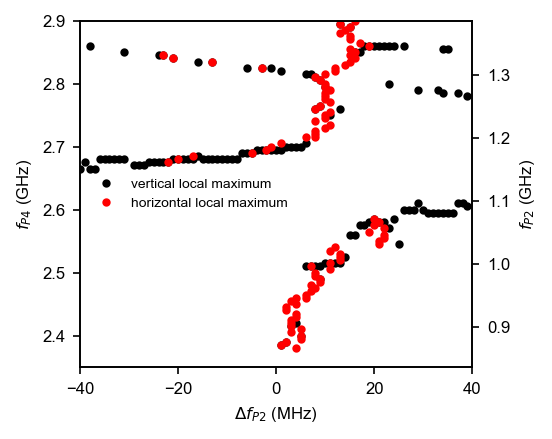

In [8]:
x=dfp2_11  #x, y, z data 
y=fp4_11
z=p_11

x_fit1=[]
x_fit2=[]
y_fit1=[]
y_fit2=[]

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(300, 80))
yr=np.reshape(y,(300, 80))
zr=np.reshape(z,(300, 80))

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.3,width=1,distance=1,prominence=0.25) #find vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,300):
    peaks, _ = find_peaks(zr[i,:],height=0.3,width=1,distance=1,prominence=0.25) #find horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #merge the vertical and horizontal peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the found points
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (GHz)
[7.03532953e-03 2.66626806e+00 1.65282827e+01]
[0.00046479 0.00119168 0.25910492]


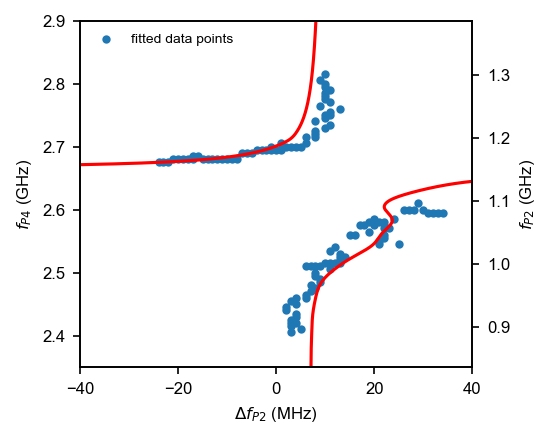

In [9]:
fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_all=[]  #these will contain data points used for the fitting 
y_fit_all=[]

for i in range(0,len(x_fit)):  
    if (y_fit[i]>2.40*10**9 and y_fit[i]<2.82*10**9) and (x_fit[i]>-25*10**6 and x_fit[i]<35*10**6): #we keep this part 
        if not(x_fit[i]>2*10**7 and y_fit[i]>2.7*10**9) and not(y_fit[i]>2.75*10**9 and x_fit[i]<0.9*10**7): #drop the ones that come from another resonane
            x_fit_all.append(x_fit[i])
            y_fit_all.append(y_fit[i])

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(lambda y, x0, y0, t: x_curve_AC2(y,x0,y0,t,22000),y_fit_all,x_fit_all,p0=[1*10**(-3),2.64,15]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (GHz)')
print(popt)
print(perr)

t_AC2_11=popt[2]  #store fit result 

y1=np.linspace(2.3,2.66,5000)
y2=np.linspace(2.67,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],22000)*1000,y1,color='red')  #plot 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],22000)*1000,y2,color='red')

ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

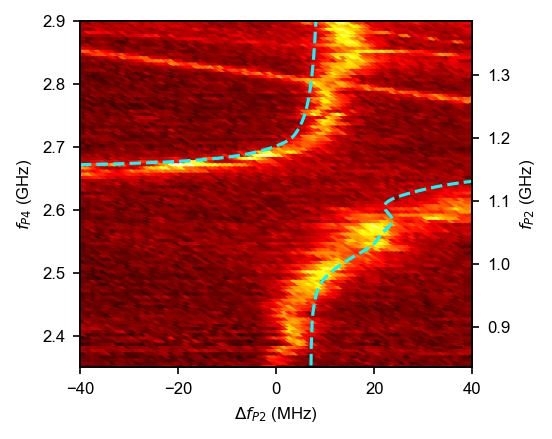

In [10]:
#plot fit result on colormap 

dfp2_11r = np.reshape(dfp2_11,(80, 300))
fp4_11r = np.reshape(fp4_11,(80, 300))
p_11r = np.reshape(p_11,(80, 300))

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.set_xlim(-40,40)

y1=np.linspace(2.3,2.66,5000)
y2=np.linspace(2.67,2.9,5000)

rbf = scipy.interpolate.Rbf(dfp2_11r*10**(-6), fp4_11r*10**(-9), p_11r, function='linear')

zi = rbf(dfp2_11r*10**(-6), fp4_11r*10**(-9))

ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],22000)*1000,y1,color='cyan',linestyle='dashed')  #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],22000)*1000,y2,color='cyan',linestyle='dashed')

ax.set_ylim(2.35,2.9)
#ax.imshow(zi, vmin=p_11r.min(), vmax=p_11r.max(), origin='lower',aspect='auto',
#           extent=[dfp2_11r.min()*10**(-6), dfp2_11r.max()*10**(-6), fp4_11r.min()*10**(-9), fp4_11r.max()*10**(-9)])

ax.scatter(dfp2_11r*10**(-6), fp4_11r*10**(-9), c=p_11r,cmap='hot') #plot the colormap 


ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax2.set_ylim(2.35-1.514,2.9-1.514)
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
fig.savefig('AC2_11_filtered.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('AC2_11_filtered.pdf',format='pdf',dpi=300,bbox_inches="tight")

## $\epsilon_{12}=20$ mV detuning voltage

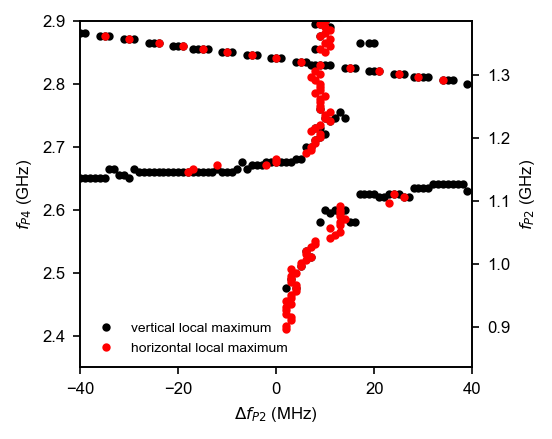

In [11]:
x=dfp2_10
y=fp4_10
z=p_10

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(300, 80))
yr=np.reshape(y,(300, 80))
zr=np.reshape(z,(300, 80))

x_fit=[]
y_fit=[]

x_fit1=[]  #horizontal and vertical peaks
x_fit2=[]
y_fit1=[]
y_fit2=[]

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.3,width=1,distance=1,prominence=0.2) #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,300):
    peaks, _ = find_peaks(zr[i,:],height=0.3,width=1,distance=1,prominence=0.2)  #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])

x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #merge the peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the points 
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (ueV)
[6.57388819e-03 2.65246803e+00 1.89120624e+01]
[0.00045425 0.00047181 0.1785883 ]


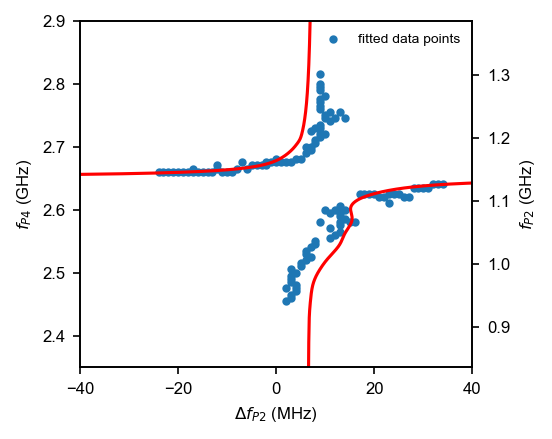

In [12]:
fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_all=[]  #data points used for fitting
y_fit_all=[]

for i in range(0,len(x_fit)):   #select the points of the anticrossing
    if (y_fit[i]>2.45*10**9 and y_fit[i]<2.82*10**9) and (x_fit[i]>-25*10**6 and x_fit[i]<35*10**6): #we keep this part 
        if not(x_fit[i]>2*10**7 and y_fit[i]>2.7*10**9) and not(y_fit[i]>2.75*10**9 and x_fit[i]<0.9*10**7): #drop the ones that come from another resonane
            x_fit_all.append(x_fit[i])
            y_fit_all.append(y_fit[i])

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(lambda y, x0, y0, t: x_curve_AC2(y,x0,y0,t,20000),y_fit_all,x_fit_all,p0=[1*10**(-3),2.65,15]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (ueV)')
print(popt)
print(perr)

t_AC2_10=popt[2]  #store fit result 

y1=np.linspace(2.35,2.65,5000)
y2=np.linspace(2.655,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],20000)*1000,y1,color='red')  #plot fitted curve 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],20000)*1000,y2,color='red')

ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

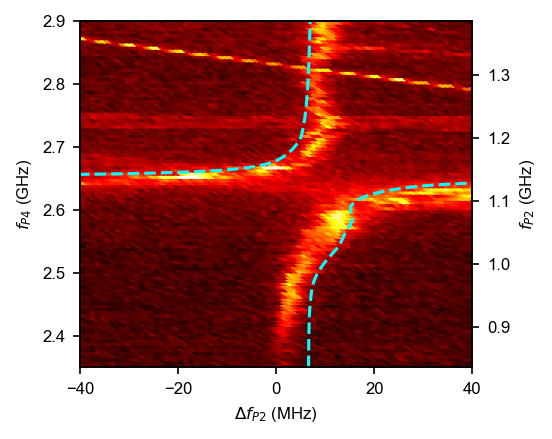

In [13]:
#plot fit result on the colormap 

dfp2_10r = np.reshape(dfp2_10,(80, 300))
fp4_10r = np.reshape(fp4_10,(80, 300))
p_10r = np.reshape(p_10,(80, 300))

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.set_xlim(-40,40)

y1=np.linspace(2.35,2.65,5000)
y2=np.linspace(2.655,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],20000)*1000,y1,color='cyan',linestyle='dashed') #plot fit result
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],20000)*1000,y2,color='cyan',linestyle='dashed')

rbf = scipy.interpolate.Rbf(dfp2_10r*10**(-6), fp4_10r*10**(-9), p_10r, function='linear')

zi = rbf(dfp2_10r*10**(-6), fp4_10r*10**(-9))

ax.imshow(zi, vmin=p_10r.min(), vmax=p_10r.max(), origin='lower',aspect='auto',
           extent=[dfp2_10r.min()*10**(-6), dfp2_10r.max()*10**(-6), fp4_10r.min()*10**(-9), fp4_10r.max()*10**(-9)])

ax.scatter(dfp2_10r*10**(-6), fp4_10r*10**(-9), c=p_10r,cmap='hot') #plot the colormap 


ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

fig.savefig('AC2_10_filtered.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('AC2_10_filtered.pdf',format='pdf',dpi=300,bbox_inches="tight")

## $\epsilon_{12}=18$ mV detuning voltage

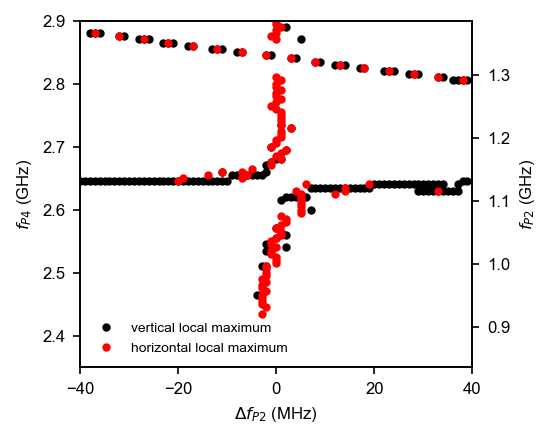

In [14]:
x=dfp2_9
y=fp4_9
z=p_9

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(300, 80))
yr=np.reshape(y,(300, 80))
zr=np.reshape(z,(300, 80))

x_fit=[]
y_fit=[]

x_fit1=[]  #vertical and horizontal peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.3,width=1,distance=1,prominence=0.15) #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,300):
    peaks, _ = find_peaks(zr[i,:],height=0.3,width=1,distance=1,prominence=0.15) #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])

x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0] #merge the horizontal and vertical points 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the points
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (ueV)
[-8.98660776e-04  2.64365476e+00  1.85946056e+01]
[0.00033972 0.00061686 0.30260319]


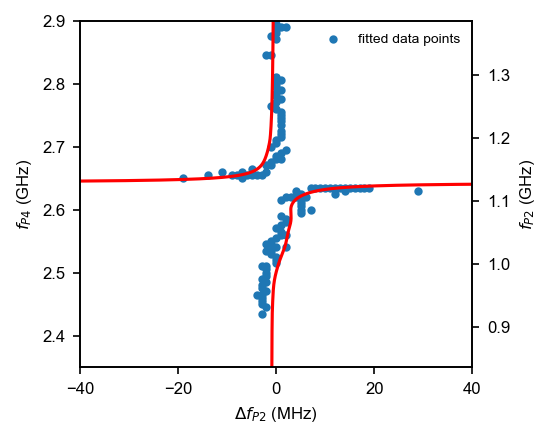

In [15]:
fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_all=[]
y_fit_all=[]

for i in range(0,len(x_fit)):    #select points of the anticrossing 
    if y_fit[i]>2.4*10**9 and y_fit[i]<2.9*10**9 and x_fit[i]<30*10**6 and x_fit[i]>-30*10**6: #we keep this range of points
        if not(y_fit[i]>2.7*10**9 and x_fit[i]>0.2*10**7) and not(y_fit[i]>2.7*10**9 and x_fit[i]<-0.3*10**7): #we drop the ones that come from another resonance 
            if y_fit[i]>2.646*10**9 and x_fit[i]<1*10**7:
                x_fit_all.append(x_fit[i])
                y_fit_all.append(y_fit[i])
            if y_fit[i]<2.64*10**9:
                x_fit_all.append(x_fit[i])
                y_fit_all.append(y_fit[i])

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(lambda y, x0, y0, t: x_curve_AC2(y,x0,y0,t,18000),y_fit_all,x_fit_all,p0=[1*10**(-3),2.65,15]) #fit
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (ueV)')
print(popt)
print(perr)

t_AC2_9=popt[2]

y1=np.linspace(2.35,2.642,5000)
y2=np.linspace(2.645,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],18000)*1000,y1,color='red') #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],18000)*1000,y2,color='red')

ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()                

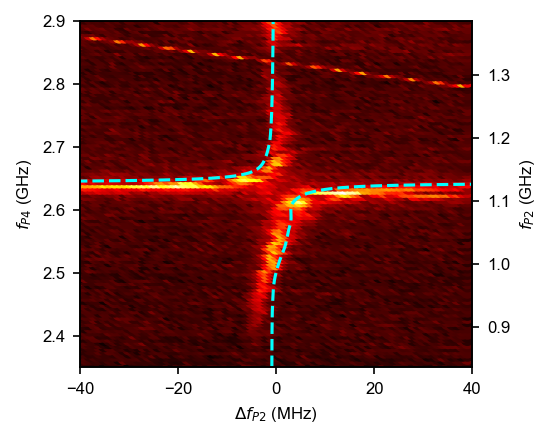

In [16]:
#plot fit result on colormap 

dfp2_9r = np.reshape(dfp2_9,(80, 300))
fp4_9r = np.reshape(fp4_9,(80, 300))
p_9r = np.reshape(p_9,(80, 300))

fig, ax = plt.subplots()
ax2=ax.twinx()

y1=np.linspace(2.35,2.642,5000)
y2=np.linspace(2.645,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],18000)*1000,y1,color='cyan',linestyle='dashed')
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],18000)*1000,y2,color='cyan',linestyle='dashed')

rbf = scipy.interpolate.Rbf(dfp2_9r*10**(-6), fp4_9r*10**(-9), p_9r, function='linear')

zi = rbf(dfp2_9r*10**(-6), fp4_9r*10**(-9))

ax.imshow(zi, vmin=p_9r.min(), vmax=p_9r.max(), origin='lower',aspect='auto',
           extent=[dfp2_9r.min()*10**(-6), dfp2_9r.max()*10**(-6), fp4_9r.min()*10**(-9), fp4_9r.max()*10**(-9)])

ax.scatter(dfp2_9r*10**(-6), fp4_9r*10**(-9), c=p_9r,cmap='hot')


ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

fig.savefig('AC2_9_filtered.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('AC2_9_filtered.pdf',format='pdf',dpi=300,bbox_inches="tight")

## $\epsilon_{12}=16$ mV detuning voltage

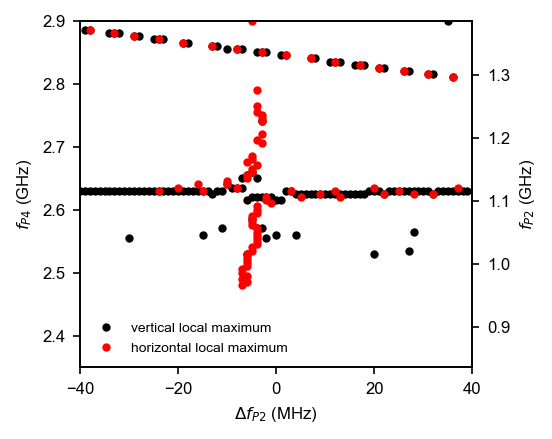

In [17]:
x=dfp2_8
y=fp4_8
z=p_8

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(300, 80))
yr=np.reshape(y,(300, 80))
zr=np.reshape(z,(300, 80))

x_fit=[]
y_fit=[]

x_fit1=[]  #vertical and horizontal peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]


for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.1,width=1,distance=2,prominence=0.12) #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,300):
    peaks, _ = find_peaks(zr[i,:],height=0.1,width=1,distance=2,prominence=0.12) #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #merge the vertical and the horizontal peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the points
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (ueV)
[-5.58537923e-03  2.62758725e+00  1.65392849e+01]
[1.22048091e-03 3.52106063e-04 4.70790094e-01]


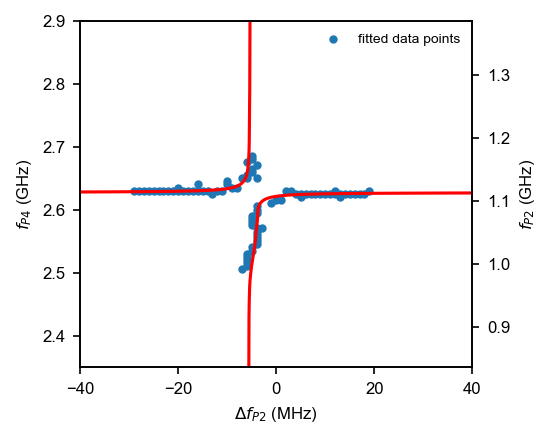

In [18]:
fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_all=[]
y_fit_all=[]

for i in range(0,len(x_fit)): #select datapoints of the anticrossing
    if y_fit[i]>2.5*10**9 and y_fit[i]<2.7*10**9 and x_fit[i]>-30*10**6 and x_fit[i]<20*10**6:
        if not(x_fit[i]>-3*10**6 and y_fit[i]<2.6*10**9) and not(x_fit[i]<-10*10**6 and y_fit[i]<2.6*10**9):
            if not(x_fit[i]<0*10**6 and x_fit[i]>-8*10**6 and y_fit[i]>2.61*10**9 and y_fit[i]<2.65*10**9):
                x_fit_all.append(x_fit[i])  #we dropped the noise and the asymptotic points which cause the fitting problem 
                y_fit_all.append(y_fit[i])

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(lambda y, x0, y0, t: x_curve_AC2(y,x0,y0,t,16000),y_fit_all,x_fit_all,p0=[1*10**(-3),2.63,15]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (ueV)')
print(popt)
print(perr)

t_AC2_8=popt[2]

y1=np.linspace(2.35,2.627,5000)
y2=np.linspace(2.6277,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],16000)*1000,y1,color='red') #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],16000)*1000,y2,color='red')

ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()                

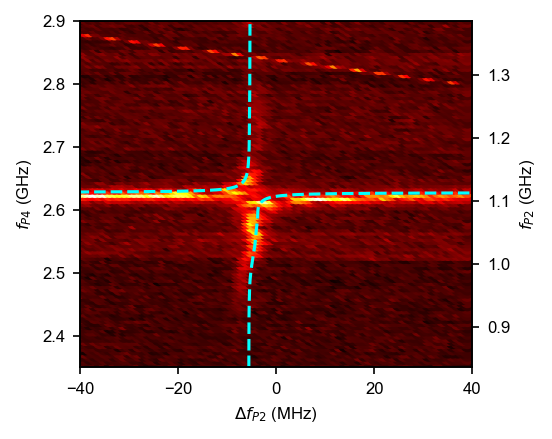

In [19]:
#plot fit result on colormap 

dfp2_8r = np.reshape(dfp2_8,(80, 300))
fp4_8r = np.reshape(fp4_8,(80, 300))
p_8r = np.reshape(p_8,(80, 300))

fig, ax = plt.subplots()
ax2=ax.twinx()

y1=np.linspace(2.35,2.627,5000)
y2=np.linspace(2.6277,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],16000)*1000,y1,color='cyan',linestyle='dashed') #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],16000)*1000,y2,color='cyan',linestyle='dashed')

rbf = scipy.interpolate.Rbf(dfp2_8r*10**(-6), fp4_8r*10**(-9), p_8r, function='linear')

zi = rbf(dfp2_8r*10**(-6), fp4_8r*10**(-9))

ax.imshow(zi, vmin=p_8r.min(), vmax=p_8r.max(), origin='lower',aspect='auto',
           extent=[dfp2_8r.min()*10**(-6), dfp2_8r.max()*10**(-6), fp4_8r.min()*10**(-9), fp4_8r.max()*10**(-9)])

ax.scatter(dfp2_8r*10**(-6), fp4_8r*10**(-9), c=p_8r,cmap='hot') #plot the colormap 


ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

fig.savefig('AC2_8_filtered.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('AC2_8_filtered.pdf',format='pdf',dpi=300,bbox_inches="tight")

## $\epsilon_{12}=14$ mV detuning voltage

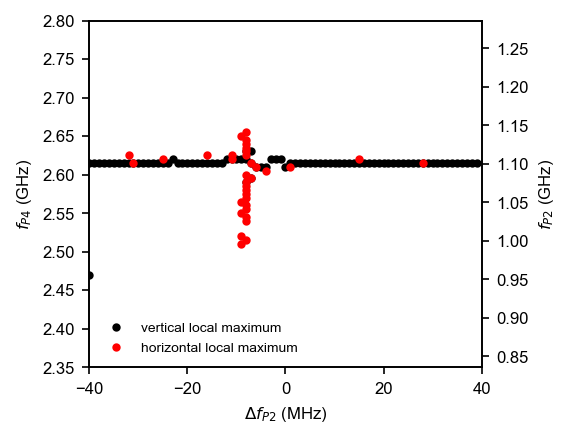

In [20]:
x=dfp2_7
y=fp4_7
z=p_7

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(300, 80))
yr=np.reshape(y,(300, 80))
zr=np.reshape(z,(300, 80))

x_fit=[]
y_fit=[]

x_fit1=[]  #horizontal and vertical peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]


for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.1,width=1,distance=2,prominence=0.12)  #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,300):
    peaks, _ = find_peaks(zr[i,:],height=0.1,width=1,distance=2,prominence=0.12)  #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #merge the vertical and horizontal peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the points
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
ax.set_ylim(2.35,2.8)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.8-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (ueV)
[-7.42040056e-03  2.61686396e+00  1.49940230e+01]
[1.69124457e-03 1.91369739e-03 4.47329025e+00]


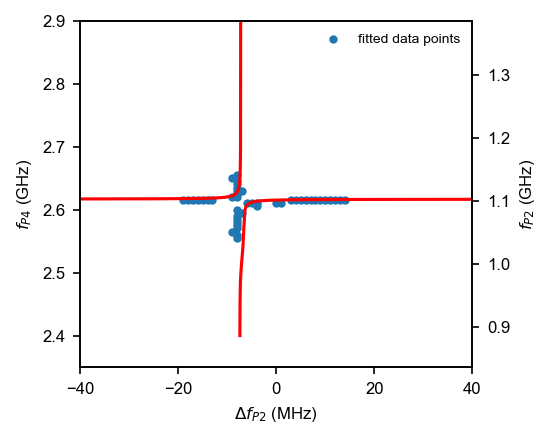

In [21]:
fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_all=[]
y_fit_all=[]

for i in range(0,len(x_fit)):  #select data points of the anticrossing 
    if y_fit[i]>2.55*10**9 and y_fit[i]<2.74*10**9 and x_fit[i]>-20*10**6 and x_fit[i]<15*10**6: #keep only this range of points
        if not(x_fit[i]>-0.8*10**7 and x_fit[i]<0.3*10**7 and y_fit[i]>2.61*10**9 and y_fit[i]<2.62*10**9):  #drop the points coming from noise 
            if not(y_fit[i]>2.615*10**9 and x_fit[i]>-0.7*10**7) and not(x_fit[i]<-0.9*10**7 and y_fit[i]>2.617*10**9):
                x_fit_all.append(x_fit[i])
                y_fit_all.append(y_fit[i])

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(lambda y, x0, y0, t: x_curve_AC2(y,x0,y0,t,14000),y_fit_all,x_fit_all,p0=[1*10**(-3),2.62,17]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (ueV)')
print(popt)
print(perr)

t_AC2_7=popt[2]

y1=np.linspace(2.4,2.6165,5000)
y2=np.linspace(2.6168,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],14000)*1000,y1,color='red')  #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],14000)*1000,y2,color='red')

ax.set_ylim(2.35,2.9)
ax.set_xlim(-40,40)
ax2.set_ylim(2.35-1.514,2.9-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()     

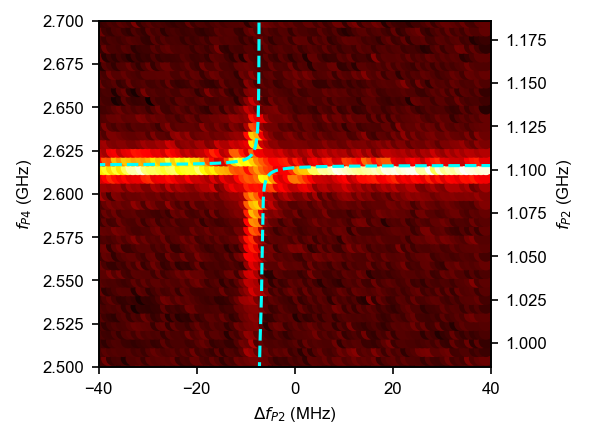

In [22]:
#plot fit result on colormap 

dfp2_7r = np.reshape(dfp2_7,(80, 300))
fp4_7r = np.reshape(fp4_7,(80, 300))
p_7r = np.reshape(p_7,(80, 300))

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.set_xlim(-40,40)

y1=np.linspace(2.4,2.6165,5000)
y2=np.linspace(2.6168,2.9,5000)
ax.plot(x_curve_AC2(y1,popt[0],popt[1],popt[2],14000)*1000,y1,color='cyan',linestyle='dashed')  #plot fit result 
ax.plot(x_curve_AC2(y2,popt[0],popt[1],popt[2],14000)*1000,y2,color='cyan',linestyle='dashed')

rbf = scipy.interpolate.Rbf(dfp2_7r*10**(-6), fp4_7r*10**(-9), p_7r, function='linear')

zi = rbf(dfp2_7r*10**(-6), fp4_7r*10**(-9))

ax.imshow(zi, vmin=p_7r.min(), vmax=p_7r.max(), origin='lower',aspect='auto',
           extent=[dfp2_7r.min()*10**(-6), dfp2_7r.max()*10**(-6), fp4_7r.min()*10**(-9), fp4_7r.max()*10**(-9)])

ax.scatter(dfp2_7r*10**(-6), fp4_7r*10**(-9), c=p_7r,cmap='hot') #plot the colormap 


ax.set_ylim(2.5,2.7)
ax.set_xlim(-40,40)
ax2.set_ylim(2.5-1.514,2.7-1.514)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

fig.savefig('AC2_7_filtered.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('AC2_7_filtered.pdf',format='pdf',dpi=300,bbox_inches="tight")

## AC1

In [23]:
data_AC1=np.loadtxt('mixing_set_delta_set_q2sum.dat')  #load the data of anticrossing AC1 
fp4_AC1=data_AC1[:,0]
dfp2_AC1=data_AC1[:,1]
p_AC1=data_AC1[:,2]

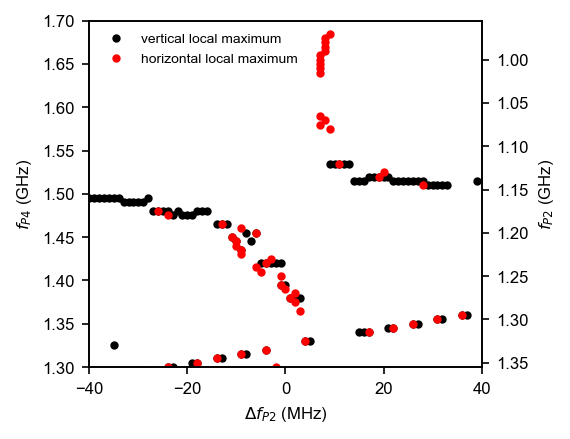

In [24]:
x=dfp2_AC1
y=fp4_AC1
z=p_AC1

fig, ax = plt.subplots()
ax2=ax.twinx()

xr=np.reshape(x,(200, 80))
yr=np.reshape(y,(200, 80))
zr=np.reshape(z,(200, 80))

x_fit1=[]  #vertical and horizontal peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.5,width=1,distance=3,prominence=0.35)  #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,200):
    peaks, _ = find_peaks(zr[i,:],height=0.5,width=1,distance=3,prominence=0.35)  #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #add together the vertical and horizontal peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the results
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')

x_fit=np.array(x_fit)
y_fit=np.array(y_fit)
        
ax.set_ylim(1.3,1.7)
ax.set_xlim(-40,40)
ax2.set_ylim(-1.3+fq2,-1.7+fq2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
x0 (GHz), y0 (GHz), t (ueV)
[-5.69716724e-04  1.50339871e+00  2.04192169e+01]
[0.00075383 0.00036109 0.16825162]


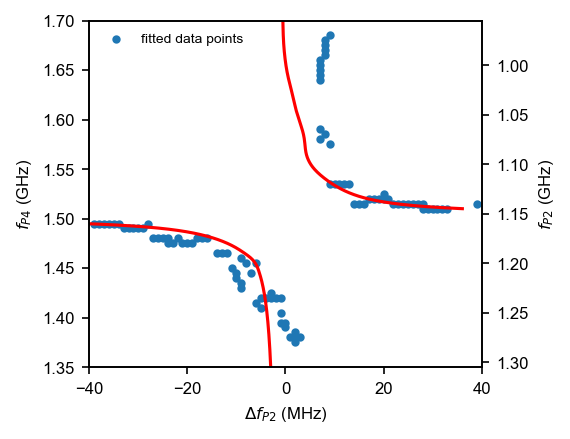

In [25]:
x_fit_all=[]
y_fit_all=[]

fig, ax = plt.subplots()
ax2=ax.twinx()

for i in range(0,len(x_fit)):
    if y_fit[i]>1.37*10**9 and y_fit[i]<1.7*10**9: #drop the points which come from another resonance 
        if x_fit[i]>-4*10**7 and x_fit[i]<4*10**7:
            if not (y_fit[i]<1.4*10**9 and x_fit[i]<-1*10**7):
                x_fit_all.append(x_fit[i])
                y_fit_all.append(y_fit[i])
                
x_fit_all=np.array(x_fit_all)
y_fit_all=np.array(y_fit_all)

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(x_curve_AC1,y_fit_all,x_fit_all,p0=[1*10**(-3),1.5,18]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results:')
print('x0 (GHz), y0 (GHz), t (ueV)')
print(popt)
print(perr)

t_AC1=popt[2]

y1=np.linspace(1.35,1.5,5000)
y2=np.linspace(1.51,1.7,5000)
ax.plot(x_curve_AC1(y1,popt[0],popt[1],popt[2])*1000,y1,color='red') #plot fit result 
ax.plot(x_curve_AC1(y2,popt[0],popt[1],popt[2])*1000,y2,color='red')

ax.set_ylim(1.35,1.7)
ax.set_xlim(-40,40)
ax2.set_ylim(2.655-1.35,2.655-1.7)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

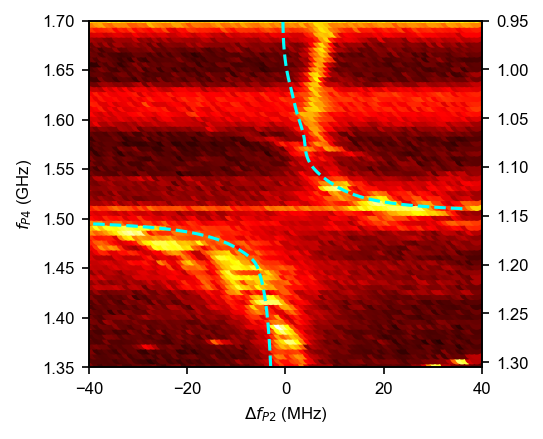

In [26]:
#plot fit result on colormap 

fig, ax = plt.subplots()
ax2=ax.twinx()

dfp2_AC1r = np.reshape(dfp2_AC1,(80, 200))
fp4_AC1r = np.reshape(fp4_AC1,(80, 200))
p_AC1r = np.reshape(p_AC1,(80, 200))

rbf = scipy.interpolate.Rbf(dfp2_AC1r*10e-6, fp4_AC1r*10e-9, p_AC1r, function='linear')

zi = rbf(dfp2_AC1r*10e-6, fp4_AC1r*10e-9)

y1=np.linspace(1.35,1.5,5000)
y2=np.linspace(1.51,1.7,5000)
ax.plot(x_curve_AC1(y1,popt[0],popt[1],popt[2])*1000,y1,color='cyan',linestyle='dashed') #plot fit result 
ax.plot(x_curve_AC1(y2,popt[0],popt[1],popt[2])*1000,y2,color='cyan',linestyle='dashed')

ax.imshow(zi, vmin=p_AC1r.min(), vmax=p_AC1r.max(), origin='lower',aspect='auto',
           extent=[dfp2_AC1r.min(), dfp2_AC1r.max(), fp4_AC1r.min(), fp4_AC1r.max()])

ax.scatter(dfp2_AC1r*10**(-6), fp4_AC1r*10**(-9), c=p_AC1r,cmap='hot') #plot the colormap 

ax.set_ylim(1.35,1.7)
ax.set_xlim(dfp2_AC1r.min()*10**(-6),dfp2_AC1r.max()*10**(-6))
ax2.set_ylim(-1.35+fq2,-1.7+fq2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
#ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

ax.set_xticks([-40,-20,0,20,40])
ax.set_yticks([1.35,1.40,1.45,1.50,1.55,1.60,1.65,1.70])
ax2.set_yticks([0.95,1.00,1.05,1.10,1.15,1.20,1.25,1.30])

fig.savefig('AC1.pdf',format='pdf',dpi=300,bbox_inches="tight")
fig.savefig('AC1.png',format='png',dpi=300,bbox_inches="tight")

## AC3

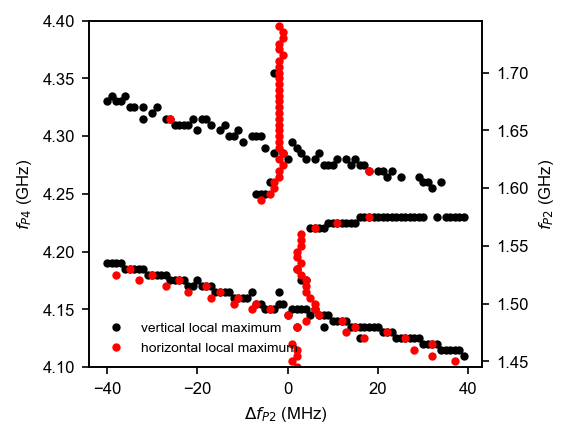

In [27]:
data_AC3=np.loadtxt('mixing_set_delta_set_q2diff.dat') #load the data of AC3 
fp4_AC3=data_AC3[:,0]
dfp2_AC3=data_AC3[:,1]
p_AC3=data_AC3[:,2]
pmax_AC3=max(p_AC3)

fig, ax = plt.subplots()
ax2=ax.twinx()

x=dfp2_AC3
y=fp4_AC3
z=p_AC3

xr=np.reshape(x,(140, 80))
yr=np.reshape(y,(140, 80))
zr=np.reshape(z,(140, 80))

dfp2_AC3r = np.reshape(dfp2_AC3,(140, 80))
fp4_AC3r = np.reshape(fp4_AC3,(140, 80))
p_AC3r = np.reshape(p_AC3,(140, 80))

x_fit1=[]  #horizontal and vertical peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.1,width=1,distance=2,prominence=0.15)  #we find vertical the peaks
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,140):
    peaks, _ = find_peaks(zr[i,:],height=0.1,width=1,distance=2,prominence=0.15)  #we find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]    #add together the horizontal and vertical points 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
y_fit1=np.array(y_fit1)
x_fit2=np.array(x_fit2)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the results
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')

x_fit=np.array(x_fit)
y_fit=np.array(y_fit)
        
ax2.set_ylim(4.1-fq2,4.4-fq2)
ax.set_ylim(4.1,4.4)
ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results: 
x0 (GHz), y0 (GHz), t*Omega (ueV^2)
[-6.71550888e-04  4.23352195e+00  2.50780117e+02]
[9.03015619e-04 7.12830693e-04 2.54793708e+01]
t, Omega (ueV)
17.85076987574427 14.048700363188104


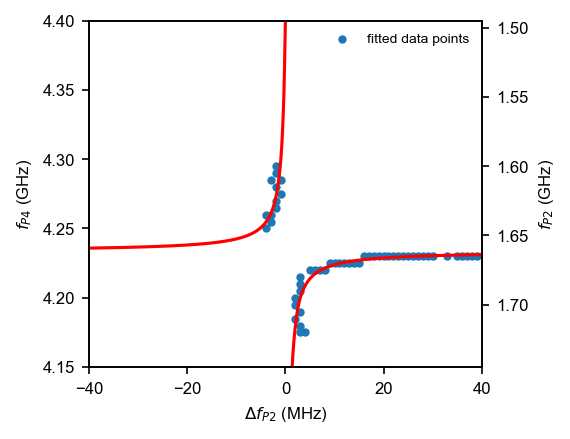

In [28]:
x_fit_all=[]
y_fit_all=[]

fig, ax = plt.subplots()
ax2=ax.twinx()

for i in range(0,len(x_fit)):  #drop the points which come from another resonance 
    if not (x_fit[i]<-0.45*10**7 and y_fit[i]>4.28*10**7) and not(x_fit[i]>-0.05*10**7 and y_fit[i]>4.245*10**9):
        if y_fit[i]>4.17*10**9 and y_fit[i]<4.3*10**9: 
            x_fit_all.append(x_fit[i])
            y_fit_all.append(y_fit[i])
                
x_fit_all=np.array(x_fit_all)
y_fit_all=np.array(y_fit_all)

x_fit_all=np.array(x_fit_all,dtype='float64')*10**(-9)
y_fit_all=np.array(y_fit_all,dtype='float64')*10**(-9)

ax.scatter(x_fit_all*10**(3),y_fit_all,marker='.',label='fitted data points') #plot the fitted data points 

popt,pcov=curve_fit(x_curve_AC3,y_fit_all,x_fit_all,p0=[1*10**(-3),4.24,220]) #fit 
perr=np.sqrt(np.diag(pcov))

print('Fit results: ')
print('x0 (GHz), y0 (GHz), t*Omega (ueV^2)')
print(popt)
print(perr)

y1=np.linspace(4.15,4.232,5000)
y2=np.linspace(4.235,4.4,5000)
ax.plot(x_curve_AC3(y1,popt[0],popt[1],popt[2])*1000,y1,color='red') #plot fit result 
ax.plot(x_curve_AC3(y2,popt[0],popt[1],popt[2])*1000,y2,color='red')

ax.set_ylim(4.15,4.4)
ax.set_xlim(-40,40)
ax2.set_ylim(4.4-2.655,4.15-2.655)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

tO=popt[2]

t_AC3=np.sqrt((GammaU+np.sqrt(GammaU**2+4*tO**2))/2)
O_AC3=tO/t_AC3

print('t, Omega (ueV)')
print(t_AC3,O_AC3)

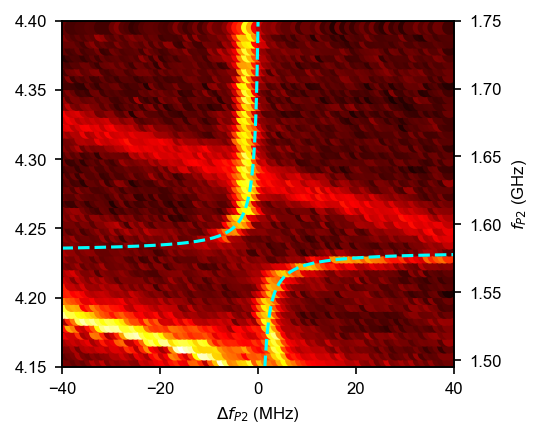

In [29]:
#plot fit result on colormap 

fig, ax = plt.subplots()
ax2=ax.twinx()

dfp2_AC3r = np.reshape(dfp2_AC3,(80, 140))
fp4_AC3r = np.reshape(fp4_AC3,(80, 140))
p_AC3r = np.reshape(p_AC3,(80, 140))

rbf = scipy.interpolate.Rbf(dfp2_AC3r*10e-6, fp4_AC3r*10e-9, p_AC3r, function='linear') 

zi = rbf(dfp2_AC3r*10e-6, fp4_AC3r*10e-9)

y1=np.linspace(4.15,4.232,5000)
y2=np.linspace(4.235,4.4,5000)
ax.plot(x_curve_AC3(y1,popt[0],popt[1],popt[2])*1000,y1,color='cyan',linestyle='dashed')
ax.plot(x_curve_AC3(y2,popt[0],popt[1],popt[2])*1000,y2,color='cyan',linestyle='dashed')

ax.imshow(zi, vmin=p_AC3r.min(), vmax=p_AC3r.max(), origin='lower',aspect='auto',
           extent=[dfp2_AC3r.min(), dfp2_AC3r.max(), fp4_AC3r.min(), fp4_AC3r.max()])

ax.scatter(dfp2_AC3r*10**(-6), fp4_AC3r*10**(-9), c=p_AC3r,cmap='hot') #plot the heatmap 

ax.set_ylim(4.15,4.4)
ax.set_xlim(dfp2_AC3r.min()*10**(-6),dfp2_AC3r.max()*10**(-6))
ax2.set_ylim(4.15-fq2,4.4-fq2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
#ax.set_ylabel(r'$f_{P4}$ [GHz]')

ax.set_xticks([-40,-20,0,20,40])
ax.set_yticks([4.15,4.20,4.25,4.30,4.35,4.40])
ax2.set_yticks([1.50,1.55,1.60,1.65,1.70,1.75])

fig.savefig('AC3.pdf',format='pdf',dpi=300,bbox_inches="tight")
fig.savefig('AC3.png',format='png',dpi=300,bbox_inches="tight")

## AC5

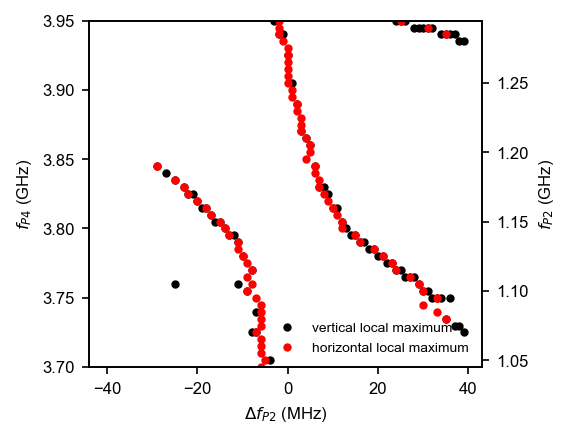

In [30]:
data_AC5=np.loadtxt('mixing_set_delta_set_q2diff.dat') #load the data of AC5 
fp4_AC5=data_AC5[:,0]
dfp2_AC5=data_AC5[:,1]
p_AC5=data_AC5[:,2]

fig, ax = plt.subplots()
ax2=ax.twinx()

x=dfp2_AC5
y=fp4_AC5
z=p_AC5


xr = np.reshape(x,(140, 80))
yr = np.reshape(y,(140, 80))
zr = np.reshape(z,(140, 80))

x_fit1=[]        #these lists will contain the coordinates of the vertical and horizontal local maximums 
y_fit1=[]

x_fit2=[]
y_fit2=[]

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.15,width=1,distance=2,prominence=0.15) #this function finds the vertical peaks, the maximums
    for j in peaks:
        #ax.scatter(xr[j,i]*10**(-6),yr[j,i]*10**(-9),marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])   
for i in range(0,140):
    peaks, _ = find_peaks(zr[i,:],height=0.15,width=1,distance=2,prominence=0.15)  #find the horizontal peaks
    for j in peaks:
        #ax.scatter(xr[i,j]*10**(-6),yr[i,j]*10**(-9),marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])

x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #we add together the horizontal and vertical peaks, counting only once
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]

x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)
        
ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the results
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')
        
x_fit=np.array(x_fit)
y_fit=np.array(y_fit)

fQ2=2.655
ax2.set_ylim(3.7-fQ2,3.95-fQ2)
ax.set_ylim(3.7,3.95)
ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
b0: 0.0010462151634469613 (GHz)
b1: -3.7954007023595584 (GHz)
t: 21.25635840638221 (ueV)


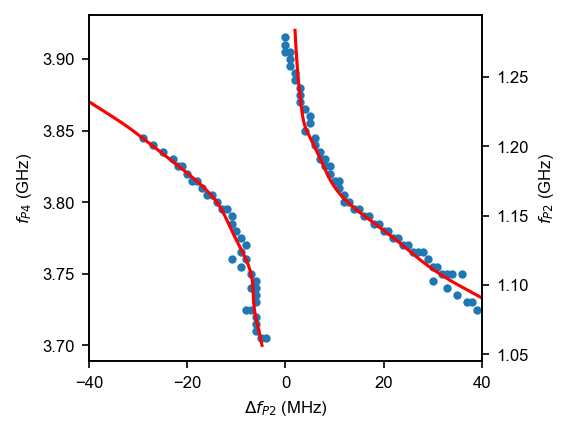

In [31]:
#fit the two curves of the anticrossings (with different equation) with shared parameters 

fig, ax = plt.subplots()
ax2=ax.twinx()

x_fit_up=[]
x_fit_down=[]
y_fit_up=[]
y_fit_down=[]
x_fit_all=[]
y_fit_all=[]
for i in range(0,len(x_fit)):   #we go through the found points 
    if y_fit[i]>3.7e9 and y_fit[i]<3.92e9:                 #we keep this range
        if not(x_fit[i]>2e7 and y_fit[i]>3.9e9) and not(x_fit[i]<-2e7 and y_fit[i]<3.78e9): #drop these points
            x_fit_all.append(x_fit[i])
            y_fit_all.append(y_fit[i])
            if x_fit[i]>-0.4e7:
                x_fit_up.append(x_fit[i])
                y_fit_up.append(y_fit[i])
            else:
                x_fit_down.append(x_fit[i])
                y_fit_down.append(y_fit[i])
                
x_fit_all=np.array(x_fit_all)
y_fit_all=np.array(y_fit_all)

x_fit_up=np.array(x_fit_up)*10**(-9)
x_fit_down=np.array(x_fit_down)*10**(-9)
y_fit_up=np.array(y_fit_up)*10**(-9)
y_fit_down=np.array(y_fit_down)*10**(-9)

y_AC5=np.concatenate((y_fit_up, y_fit_down))
x_AC5=np.concatenate((x_fit_up,x_fit_down))

initial_params = np.array([2.2*10**(-3),-3.8,20])
problem = minimize(shared_objective_AC5, initial_params, args=(y_fit_up,y_fit_down,x_fit_up,x_fit_down), method='Nelder-Mead') #fit

# Retrieve the optimized parameters
fit_params = problem.x

print("Fit results:")
print(f"b0: {fit_params[0]} (GHz)")
print(f"b1: {fit_params[1]} (GHz)")
print(f"t: {fit_params[2]} (ueV)")

t_AC5=fit_params[2]

y_u=np.linspace(3.7,3.92,5000)
y_d=np.linspace(3.7,3.92,5000)
ax.set_xlim(-40,40)
ax2.set_ylim(-fQ2+3.7,-fQ2+3.95)
ax.plot(x_curve_AC5_up(y_u,fit_params[0],fit_params[1],fit_params[2])*1000,y_u,color='red') #show fit result 
ax.plot(x_curve_AC5_down(y_d,fit_params[0],fit_params[1],fit_params[2])*1000,y_d,color='red')

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')

ax.scatter(x_fit_all*10**(-6),y_fit_all*10**(-9),marker='.',label='fitted data points') 

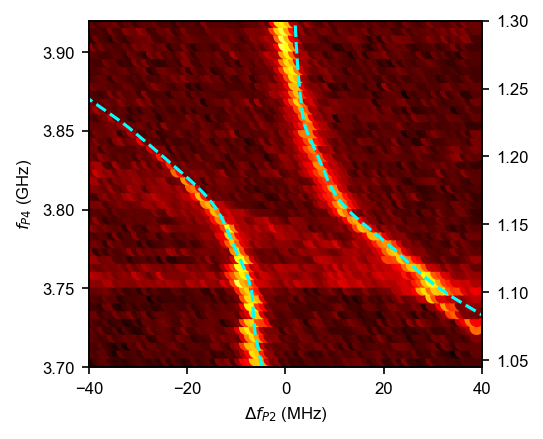

In [32]:
#plot fit result on colormap 
fig, ax = plt.subplots()
ax2=ax.twinx()

dfp2_AC5r = np.reshape(dfp2_AC5,(80, 140))
fp4_AC5r = np.reshape(fp4_AC5,(80, 140))
p_AC5r = np.reshape(p_AC5,(80, 140))

rbf = scipy.interpolate.Rbf(dfp2_AC5r*10e-6, fp4_AC5r*10e-9, p_AC5r, function='linear')

zi = rbf(dfp2_AC5r*10e-6, fp4_AC5r*10e-9)

ax.set_ylim(3.7,3.92)

y_u=np.linspace(3.7,3.92,5000)
y_d=np.linspace(3.7,3.92,5000)
ax.plot(x_curve_AC5_up(y_u,fit_params[0],fit_params[1],fit_params[2])*1000,y_u,linestyle='dashed',color='cyan') #fit result
ax.plot(x_curve_AC5_down(y_d,fit_params[0],fit_params[1],fit_params[2])*1000,y_d,linestyle='dashed',color='cyan')

ax.imshow(zi, vmin=p_AC5r.min(), vmax=p_AC5r.max(), origin='lower',aspect='auto',
           extent=[dfp2_AC5r.min(), dfp2_AC5r.max(), fp4_AC5r.min(), fp4_AC5r.max()])

ax.scatter(dfp2_AC5r*10**(-6), fp4_AC5r*10**(-9), c=p_AC5r,cmap='hot')  #plot the colormap 

ax.set_xlim(dfp2_AC5r.min()*10**(-6),dfp2_AC5r.max()*10**(-6))
ax2.set_ylim(3.7-fQ2,3.92-fQ2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
#ax2.set_ylabel(r'$f_{P2}$ [GHz]')
ax.set_ylabel(r'$f_{P4}$ (GHz)')

ax.set_xticks([-40,-20,0,20,40])
ax.set_yticks([3.70,3.75,3.80,3.85,3.90])
ax2.set_yticks([1.05,1.10,1.15,1.20,1.25,1.30])

fig.savefig('AC5.pdf',format='pdf',dpi=300,bbox_inches="tight")
fig.savefig('AC5.png',format='png',dpi=300,bbox_inches="tight")

## AC4

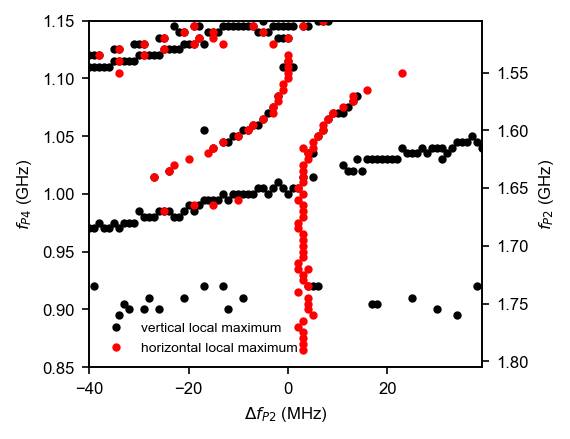

In [33]:
fig, ax = plt.subplots()
ax2=ax.twinx()

data_AC4=np.loadtxt('mixing_set_delta_set_q2sum.dat')  #load the data of AC4 
fp4_AC4=data_AC4[:,0]
dfp2_AC4=data_AC4[:,1]
p_AC4=data_AC4[:,2]

dfp2_AC4r = np.reshape(dfp2_AC4,(80, 200))
fp4_AC4r = np.reshape(fp4_AC4,(80, 200))
p_AC4r = np.reshape(p_AC4,(80, 200))

x_fit1=[] #horizontal and vertical peaks 
x_fit2=[]
y_fit1=[]
y_fit2=[]

x=dfp2_AC4r
y=fp4_AC4r
z=p_AC4r

xr=np.reshape(x,(200, 80))
yr=np.reshape(y,(200, 80))
zr=np.reshape(z,(200, 80))

for i in range(0,80):
    peaks, _ = find_peaks(zr[:,i],height=0.1,width=1,distance=1,prominence=0.11) #find the vertical peaks 
    for j in peaks:
        #scatter(xr[j,i],yr[j,i],marker='.',color='black')
        x_fit1.append(xr[j,i])
        y_fit1.append(yr[j,i])
        
for i in range(0,200):
    peaks, _ = find_peaks(zr[i,:],height=0.1,width=1,distance=1,prominence=0.11)  #find the horizontal peaks 
    for j in peaks:
        #scatter(xr[i,j],yr[i,j],marker='.',color='red')
        x_fit2.append(xr[i,j])
        y_fit2.append(yr[i,j])
        
x_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[0]  #merge the vertical and horizontal peaks 
y_fit=merge_lists(x_fit1,x_fit2,y_fit1,y_fit2)[1]
        
x_fit1=np.array(x_fit1)
x_fit2=np.array(x_fit2)
y_fit1=np.array(y_fit1)
y_fit2=np.array(y_fit2)

ax.plot(x_fit1*10**(-6),y_fit1*10**(-9),linestyle='',marker='.',color='black',label='vertical local maximum') #plot the peaks 
ax.plot(x_fit2*10**(-6),y_fit2*10**(-9),linestyle='',marker='.',color='red',label='horizontal local maximum')

ax.set_ylim(0.85,1.15)
ax.set_xlim(dfp2_AC4r.min()*10**(-6),dfp2_AC4r.max()*10**(-6))
ax2.set_ylim(-0.85+fq2,-1.15+fq2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax.legend()

Fit results:
b0: 0.0030114560377269323 (GHz)
b1: -1.0636075790883823 (GHz)
tO: 247.82929498381293 (t*Omega (ueV^2))
t: (ueV) 17.770277720254466
O: (ueV) 13.94628147546273


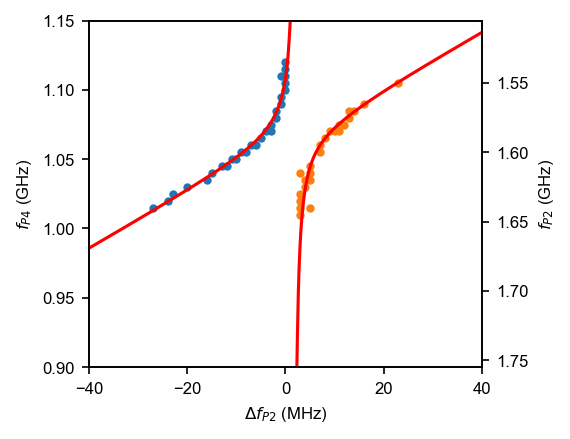

In [34]:
#manually dropping the resonance points which correspond to another resonance lines 
#fit the two parts of the anticrossing (with different equations) with shared parameters
x_fit_all=[]
y_fit_all=[]
x_fit_up=[]   #data points of the upper branch 
x_fit_down=[] #data points of the lower branch 
y_fit_up=[]
y_fit_down=[]

fig, ax = plt.subplots()
ax2=ax.twinx()

for i in range(0,len(x_fit)):
    if (y_fit[i]>1*10**9 and y_fit[i]<1.13*10**9):  #keep this range and drop the points coming from another resonance 
        if not(x_fit[i]>0.5*10**7 and y_fit[i]<1.052*10**9) and not(y_fit[i]<1.02*10**9 and (x_fit[i]<0.1*10**7 and x_fit[i]>-2.6*10**7)) and not(x_fit[i]<-1.7*10**7 and y_fit[i]>1.05*10**9):
            if not(y_fit[i]>1.1*10**9 and x_fit[i]<-2*10**7) and not(y_fit[i]<1*10**9 and x_fit[i]<-2*10**7) and not(x_fit[i]>0.0*10**7 and x_fit[i]<0.3*10**7):
                if not(x_fit[i]<-16*10**6 and y_fit[i]>1.05*10**9):
                    x_fit_all.append(x_fit[i])
                    y_fit_all.append(y_fit[i])
                    if x_fit[i]>0:
                        x_fit_down.append(x_fit[i])
                        y_fit_down.append(y_fit[i])
                    else:
                        x_fit_up.append(x_fit[i])
                        y_fit_up.append(y_fit[i])

x_fit_all=np.array(x_fit_all)*10**(-9)
y_fit_all=np.array(y_fit_all)*10**(-9)
x_fit_up=np.array(x_fit_up)*10**(-9)
y_fit_up=np.array(y_fit_up)*10**(-9)
x_fit_down=np.array(x_fit_down)*10**(-9)
y_fit_down=np.array(y_fit_down)*10**(-9)

y_AC4=np.concatenate((y_fit_up, y_fit_down))
x_AC4=np.concatenate((x_fit_up,x_fit_down))

initial_params = np.array([8*10**(-3),-1.09,290])

problem = minimize(shared_objective_AC4, initial_params, args=(y_fit_up,y_fit_down,x_fit_up,x_fit_down), method='Nelder-Mead') #fit

# Retrieve the optimized parameters
fit_params = problem.x

# Print the fit results
print("Fit results:")
print(f"b0: {fit_params[0]} (GHz)")
print(f"b1: {fit_params[1]} (GHz)")
print(f"tO: {fit_params[2]} (t*Omega (ueV^2))")

tO_AC4=fit_params[2]

t_AC4=np.sqrt((GammaU+np.sqrt(GammaU**2+4*tO_AC4**2))/2)
O_AC4=tO_AC4/t_AC4

print('t: (ueV)',t_AC4)
print('O: (ueV)',O_AC4)

y_u=np.linspace(0.9,1.15,5000)
y_d=np.linspace(0.9,1.15,5000)
ax2.set_ylim(fQ2-0.9,fQ2-1.15)
ax.plot(x_curve_AC4_up(y_u,fit_params[0],fit_params[1],fit_params[2])*1000,y_u,color='red')  #plot fit result 
ax.plot(x_curve_AC4_down(y_d,fit_params[0],fit_params[1],fit_params[2])*1000,y_d,color='red')

ax.set_ylim(0.9,1.15)
ax.set_xlim(-40,40)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax.set_ylabel(r'$f_{P4}$ (GHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')

ax.scatter(x_fit_up*1000,y_fit_up,marker='.',label='fitted data points') #plot the fitted data points
ax.scatter(x_fit_down*1000,y_fit_down,marker='.',label='fitted data points') #plot the fitted data points

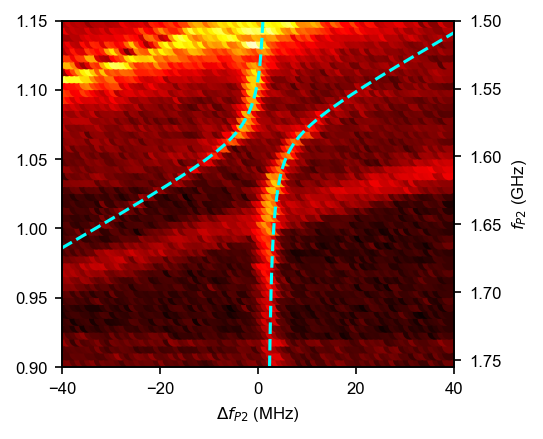

In [35]:
#plot the fit result on the colormap 

fig, ax = plt.subplots()
ax2=ax.twinx()

dfp2_AC4r = np.reshape(dfp2_AC4,(80, 200))
fp4_AC4r = np.reshape(fp4_AC4,(80, 200))
p_AC4r = np.reshape(p_AC4,(80, 200))

rbf = scipy.interpolate.Rbf(dfp2_AC4r*10e-6, fp4_AC4r*10e-9, p_AC4r, function='linear')

zi = rbf(dfp2_AC4r*10e-6, fp4_AC4r*10e-9)

y_u=np.linspace(0.9,1.15,5000)
y_d=np.linspace(0.9,1.15,5000)
ax2.set_ylim(fQ2-0.9,fQ2-1.15)
ax.plot(x_curve_AC4_up(y_u,fit_params[0],fit_params[1],fit_params[2])*1000,y_u,linestyle='dashed',color='cyan') #fit result 
ax.plot(x_curve_AC4_down(y_d,fit_params[0],fit_params[1],fit_params[2])*1000,y_d,linestyle='dashed',color='cyan')

ax.imshow(zi, vmin=p_AC4r.min(), vmax=p_AC4r.max(), origin='lower',aspect='auto',
           extent=[dfp2_AC4r.min(), dfp2_AC4r.max(), fp4_AC4r.min(), fp4_AC4r.max()])

ax.scatter(dfp2_AC4r*10**(-6), fp4_AC4r*10**(-9), c=p_AC4r,cmap='hot')  #plot the heatmap 

ax.set_ylim(0.9,1.15)
ax.set_xlim(dfp2_AC4r.min()*10**(-6),dfp2_AC4r.max()*10**(-6))
ax2.set_ylim(-0.9+fq2,-1.15+fq2)

ax.set_xlabel(r'$\Delta f_{P2}$ (MHz)')
ax2.set_ylabel(r'$f_{P2}$ (GHz)')
#ax.set_ylabel(r'$f_{P4}$ [GHz]')

ax.set_xticks([-40,-20,0,20,40])
ax.set_yticks([0.90,0.95,1.00,1.05,1.10,1.15])
ax2.set_yticks([1.50,1.55,1.60,1.65,1.70,1.75])

fig.savefig('AC4.png', format='png', dpi=300,bbox_inches="tight")
fig.savefig('AC4.pdf', format='pdf', dpi=300,bbox_inches="tight")

# Calculating $\Omega$ spin-flip tunnelings

In [36]:
#calculate Omega spin-flip tunnelings from t spin-conserving tunneling 

O_AC1=t_to_O(t_AC1)
O_AC2_11=t_to_O(t_AC2_11)
O_AC2_10=t_to_O(t_AC2_10)
O_AC2_9=t_to_O(t_AC2_9)
O_AC2_8=t_to_O(t_AC2_8)
O_AC2_7=t_to_O(t_AC2_7)
O_AC5=t_to_O(t_AC5)

In [37]:
t=[t_AC1,t_AC2_7,t_AC2_8,t_AC2_9,t_AC2_10,t_AC2_11,t_AC3,t_AC4,t_AC5]  #different t values 
t=np.array(t)
t_avg=t.mean()  #average parameter
dt_avg=t.std() 

O=[O_AC1,O_AC2_7,O_AC2_8,O_AC2_9,O_AC2_10,O_AC2_11,O_AC3,O_AC4,O_AC5]  #different Omega values 
O=np.array(O)
O_avg=O.mean()  #average parameter
dO_avg=O.std()
print(t)
print(O)

print("t: (ueV)",t_avg, dt_avg)
print("O: (ueV)",O_avg, dO_avg)

[20.41921687 14.99402299 16.53928492 18.59460563 18.91206236 16.52828271
 17.85076988 17.77027772 21.25635841]
[17.19477869 10.17529962 12.33952764 14.98250164 15.37472275 12.32477691
 14.04870036 13.94628148 18.18100023]
t: (ueV) 18.096097943069715 1.855004063453877
O: (ueV) 14.28528770225023 2.357191727968491


## Monochromatic Rabi frequencies 

## $\mathrm{Q2^{P2}}$

In [38]:
eps=alpha*20000

error=dO_avg/O_avg+dt_avg/t_avg  #relative error of the frequencies 

fQ2=2.655
fQ2b=2.714
fQ1=1.514
fQ1b=1.570

f_Q2P2=4*epsP2(fQ2)*eps*U*O_avg*t_avg/(U**2-eps**2)**2  #calculate the frequency 
f_Q2P2=ueV_to_MHz(f_Q2P2)
df_Q2P2=f_Q2P2*error
print('Result (MHz) :',f_Q2P2,df_Q2P2)  #print the result and uncertainty in MHz 

Result (MHz) : 19.034014918752447 5.091919898742862


## $\mathrm{Q2\_^{P2}}$

In [39]:
f_Q2bP2=4*epsP2(fQ2b)*eps*U*O_avg*t_avg/(U**2-eps**2)**2 #calculate the frequency 
f_Q2bP2=ueV_to_MHz(f_Q2bP2)
df_Q2bP2=f_Q2bP2*error
print('Result (MHz) :',f_Q2bP2,df_Q2bP2)  #print the result and the uncertainty in MHz 

Result (MHz) : 18.647098453301187 4.988413220935148


## $\mathrm{Q1^{P4}}$

In [40]:
f_Q1P4=4*epsP4(fQ1)*eps*U*O_avg*t_avg/(U**2-eps**2)**2  #calculate the frequency 
f_Q1P4=ueV_to_MHz(f_Q1P4)
df_Q1P4=f_Q1P4*error
print('Result (MHz) :',f_Q1P4,df_Q1P4)  #print the result and the uncertainty in MHz 

Result (MHz) : 2.9023436443544632 0.7764258575377327


## $\mathrm{Q1\_^{P4}}$

In [41]:
f_Q1P4=4*epsP4(fQ1b)*eps*U*O_avg*t_avg/(U**2-eps**2)**2  #calculate the frequency 
f_Q1P4=ueV_to_MHz(f_Q1P4)
df_Q1P4=f_Q1P4*error
print('Result (MHz) :',f_Q1P4,df_Q1P4)  #print the result and the uncertainty in MHz 

Result (MHz) : 2.999210751901137 0.8023394419578348


## $\mathrm{Q1^{-P2,P4}}$

In [42]:
fp4=3.45     #this is the frequency of plunger P4 
fp2=fp4-fQ1  #frequency of plunger P2 

f_Q1P4mP2=2*epsP2(fp2)*epsP4(fp4)*U*(U**2+3*eps**2)*O_avg*t_avg/(U**2-eps**2)**3  #calculate frequency 
f_Q1P4mP2=ueV_to_MHz(f_Q1P4mP2)
df_Q1P4mP2=f_Q1P4mP2*error

print('Result (MHz) :',f_Q1P4mP2,df_Q1P4mP2)  #print the result and the uncertainty in MHz 

Result (MHz) : 0.5874491132153452 0.15715254200694515


## $\mathrm{Q2^{-P2,P4}}$

In [43]:
fp4=4.2
fp2=fp4-fQ2

f_Q2P4mP2=2*epsP2(fp2)*epsP4(fp4)*U*(U**2+3*eps**2)*O_avg*t_avg/(U**2-eps**2)**3  #calculate the frequency 
f_Q2P4mP2=ueV_to_MHz(f_Q2P4mP2)
df_Q2P4mP2=f_Q2P4mP2*error

print('Result (MHz) :',f_Q2P4mP2,df_Q2P4mP2)  #print the result and the uncertainty in MHz 

Result (MHz) : 0.39849740355852237 0.10660477400266741


## $\mathrm{Q2^{P2,P4}}$

In [44]:
fp4=1.2      #frequency of plunger P4 in GHz 
fp2=fQ2-fp4  #frequnecy of plunger P2 in GHz 

f_Q2P4P2=2*epsP2(fp2)*epsP4(fp4)*U*(U**2+3*eps**2)*O_avg*t_avg/(U**2-eps**2)**3  #calculate the frequency
f_Q2P4P2=ueV_to_MHz(f_Q2P4P2)
df_Q2P4P2=f_Q2P4P2*error

print('Result (MHz) :',f_Q2P4P2,df_Q2P4P2)  #plot the frequency and the uncertainty in MHz 

Result (MHz) : 0.6510203655516041 0.17415892379978956


# Detuning dependence of anticrossing size

t (ueV):  17.179334689146106


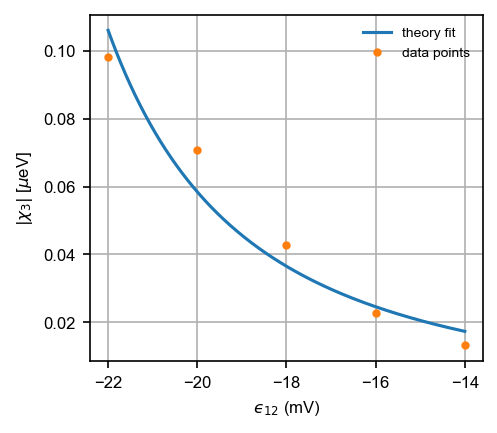

In [45]:
fig, ax = plt.subplots()

t_AC2=np.array([t_AC2_11,t_AC2_10,t_AC2_9,t_AC2_8,t_AC2_7])  #t values of AC2
eps12_AC2=np.linspace(-22000,-14000,5)
chi3=chi3_AC2(t_AC2,eps12_AC2,1.1)    #calculate chi3 matrix element at fp2=1.1 GHz frequency 

popt,pcov=curve_fit(chi3_fit,eps12_AC2,chi3,p0=17)  #fit the chi3 values 
perr=np.sqrt(np.diag(pcov))

t_AC2=popt[0]   #fit result 
print('t (ueV): ',t_AC2)

eps12_plot=np.linspace(-14000,-22000,5000)

ax.plot(eps12_plot/1000,chi3_fit(eps12_plot,popt[0]),label='theory fit')                #plot fit results 
ax.plot(eps12_AC2/1000,chi3,linestyle='',label='data points',marker='o',markersize=3)

ax.set_xlabel(r'$ϵ_{12}$ (mV)')
ax.set_ylabel(r'$|\chi_3|$ [$\mu$eV]')
ax.grid(True)
ax.legend()

fig.savefig('anticrossing-detuning-fit.png', format='png', dpi=300,bbox_inches="tight")
fig.savefig('anticrossing-detuning-fit.pdf', format='pdf', dpi=300,bbox_inches="tight")